<a href="https://colab.research.google.com/github/RunningWei/UGATIT/blob/master/colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone https://github.com/RunningWei/UGATIT.git

Cloning into 'UGATIT'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 111 (delta 5), reused 1 (delta 0), pack-reused 96
Receiving objects: 100% (111/111), 4.77 MiB | 31.33 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
%cd  UGATIT

/content/UGATIT


## prepare dataset

In [0]:
!unzip 

!mkdir selfie2anime

!mv test* selfie2anime

!mv train* selfie2anime

!mkdir dataset
!mv selfie2anime dataset

## download pretrained model

In [0]:
!wget https://www.dropbox.com/s/a27g94g5s731xts/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing.torrent?dl=1
  
!apt-get install aria2

!aria2c -S /content/UGATIT/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing.torrent?dl=1

!aria2c /content/UGATIT/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing.torrent?dl=1

In [68]:
!ls -s /content/drive/My\ Drive/UGATIT/checkpoint/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/*

      1 '/content/drive/My Drive/UGATIT/checkpoint/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/checkpoint'
7860713 '/content/drive/My Drive/UGATIT/checkpoint/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/UGATIT.model-1000000.data-00000-of-00001'
     31 '/content/drive/My Drive/UGATIT/checkpoint/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/UGATIT.model-1000000.index'
  14706 '/content/drive/My Drive/UGATIT/checkpoint/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/UGATIT.model-1000000.meta'


## test

In [0]:
!python main.py --dataset selfie2anime --phase test  --light false --checkpoint_dir /content/drive/My\ Drive/UGATIT/checkpoint

In [63]:
!python main.py --dataset selfie2anime --phase test  --light false

W0819 13:49:43.786116 139748808877952 deprecation_wrapper.py:119] From main.py:88: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0819 13:49:43.786525 139748808877952 deprecation_wrapper.py:119] From main.py:88: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

2019-08-19 13:49:43.814475: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-08-19 13:49:43.816441: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2b00840 executing computations on platform Host. Devices:
2019-08-19 13:49:43.816482: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-19 13:49:43.838679: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-08-19 13:49:43.999677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had nega

## show results

In [75]:
import os
results_path = '/content/UGATIT/results/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing'
results_waifu = [file for file in os.listdir(results_path) if file[:6]=='female']
len(results_waifu)

100

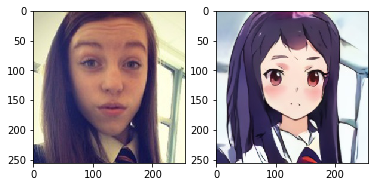

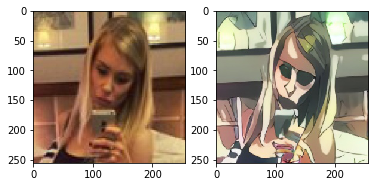

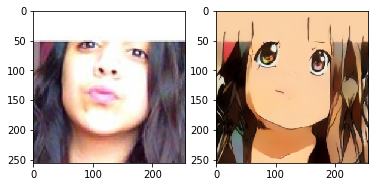

In [77]:
import matplotlib.pyplot as plt
for fname in results_waifu[:3]:
  selfie = os.path.join('/content/UGATIT/dataset/selfie2anime/testA', fname)
  waifu = os.path.join(results_path, fname)
  plt.subplot(121)
  plt.imshow(plt.imread(selfie))
  plt.subplot(122)
  plt.imshow(plt.imread(waifu))
  plt.show()

## download results

In [0]:
!zip -r  results.zip results

In [0]:
from google.colab import files
files.download('results.zip')